#### grp

# An Introduction to Statistical Learning:
-  Lab
-  Applied
-  Exercise Solutions (**unofficial**) => https://rpubs.com/ppaquay/65559

## _3.6 Lab: Linear Regression_

### _3.6.1 Libraries_

In [1]:
library(MASS)
library(ISLR)

### _3.6.2 Simple Linear Regression_

In [2]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [3]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
lm.fit=lm(medv~lstat, data=Boston) # lm.fit => variable name (not to be confused with fit(...) in python)
attach(Boston) # pin dataset to workspace

In [5]:
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [6]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [7]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [8]:
confint(lm.fit) # conf intervals

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [9]:
predict(lm.fit, data.frame(lstat=c(5,10,15)), interval="confidence") # conf intervals for new data points

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [10]:
predict(lm.fit, data.frame(lstat=c(5,10,15)), interval="prediction") # pred intervals for new data points

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


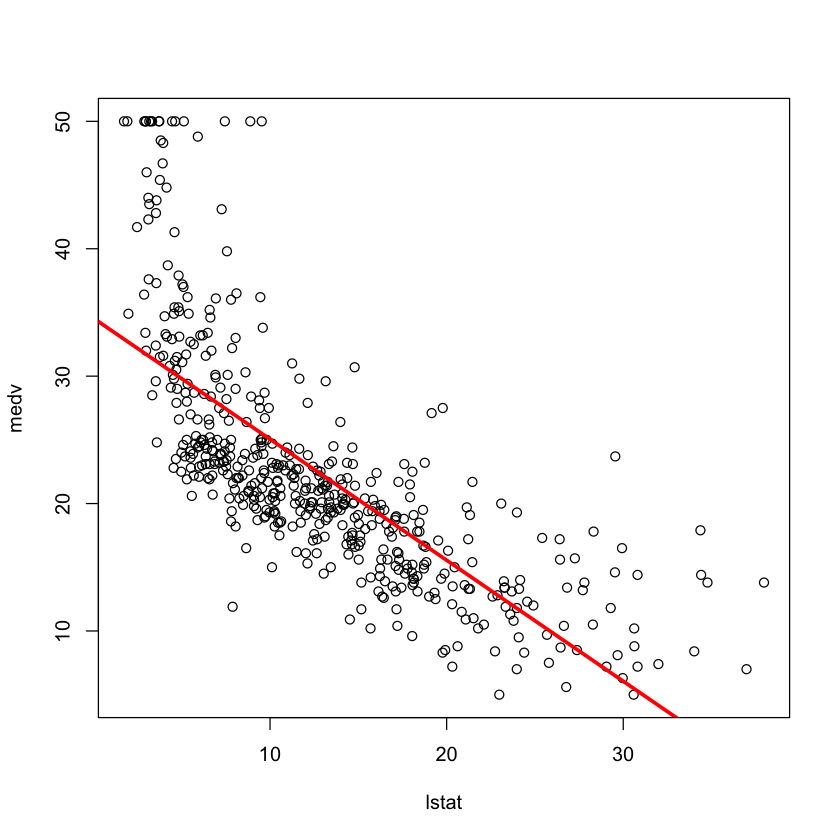

In [11]:
plot(lstat, medv)
abline(lm.fit, lwd=3, col="red")

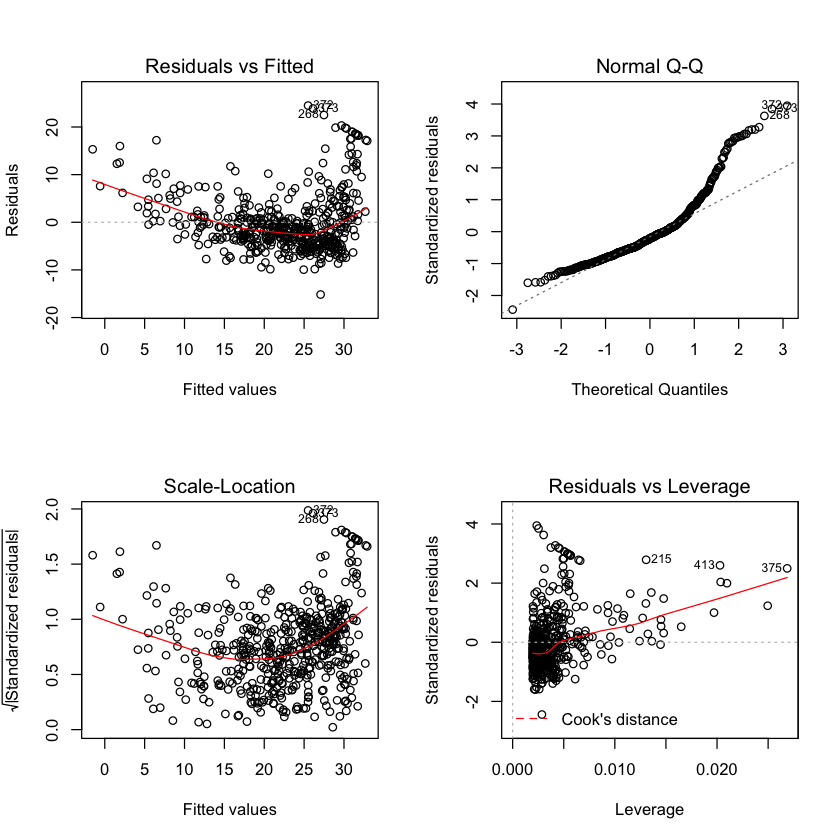

In [12]:
par(mfrow=c(2,2)) # 2x2 plots
plot(lm.fit) # standard plots from fit

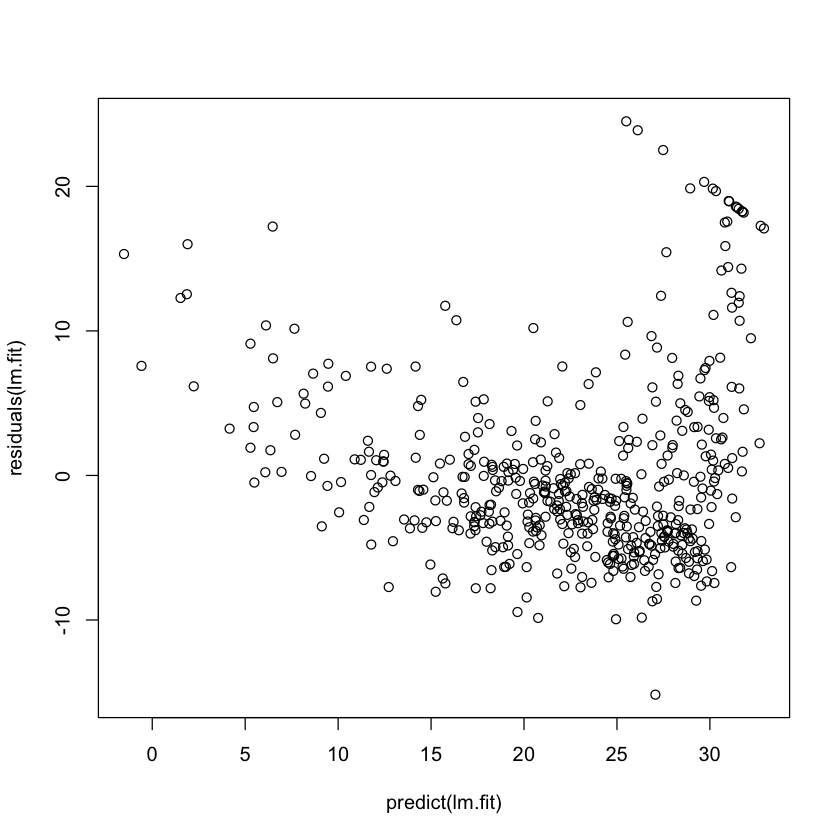

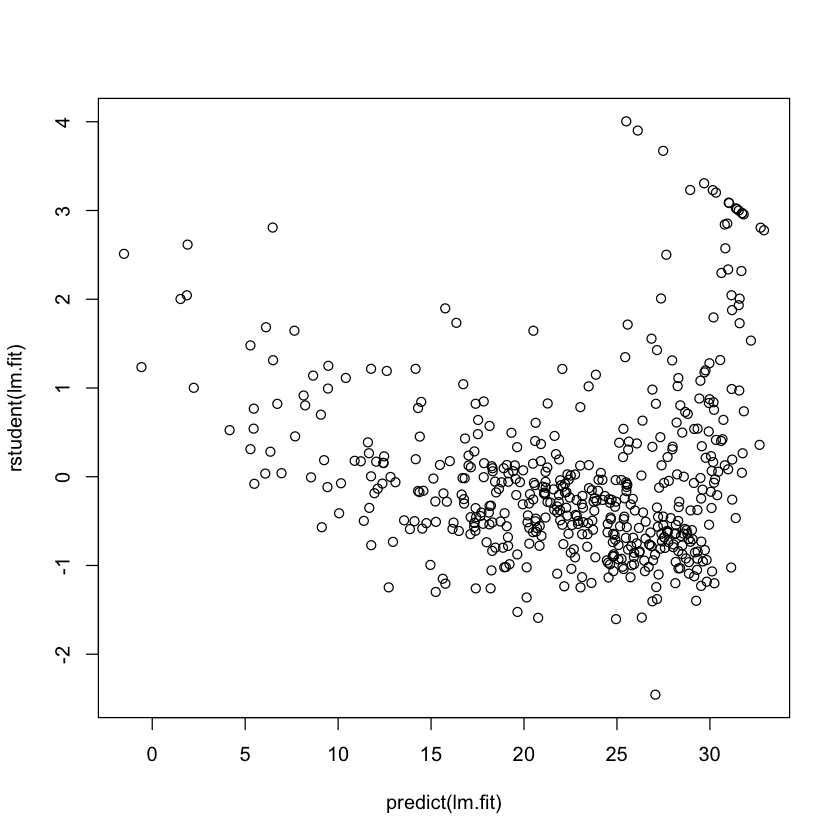

In [13]:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

375 
375

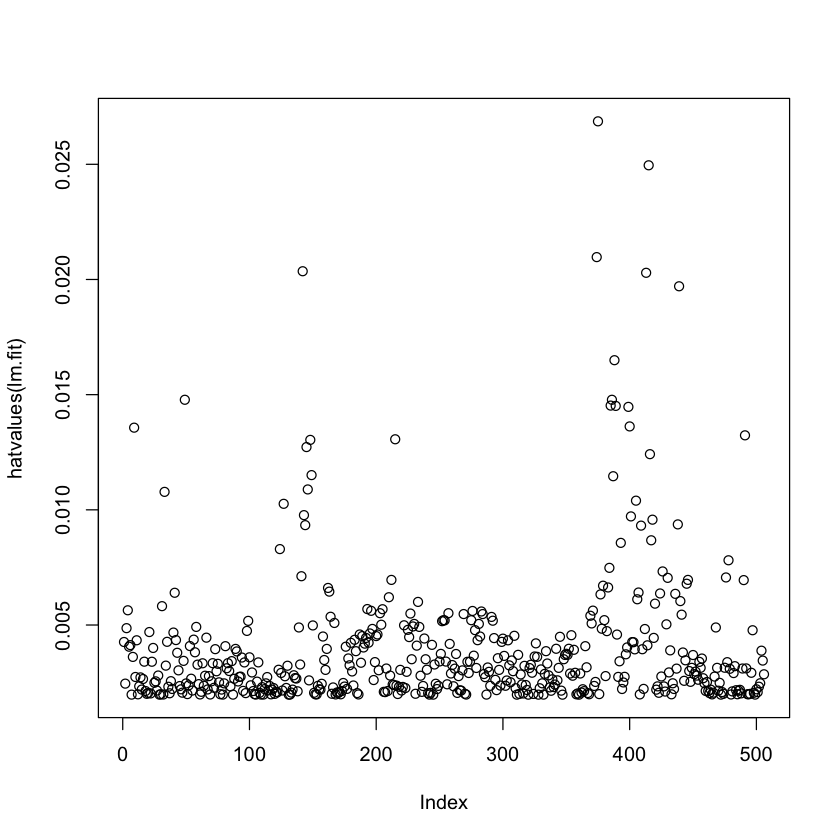

In [14]:
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit)) # index pos with largest element of vector

### _3.6.3 Multiple Linear Regression_

In [15]:
lm.fit=lm(medv~lstat+age,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [16]:
lm.fit=lm(medv~.,Boston) # include all vars
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

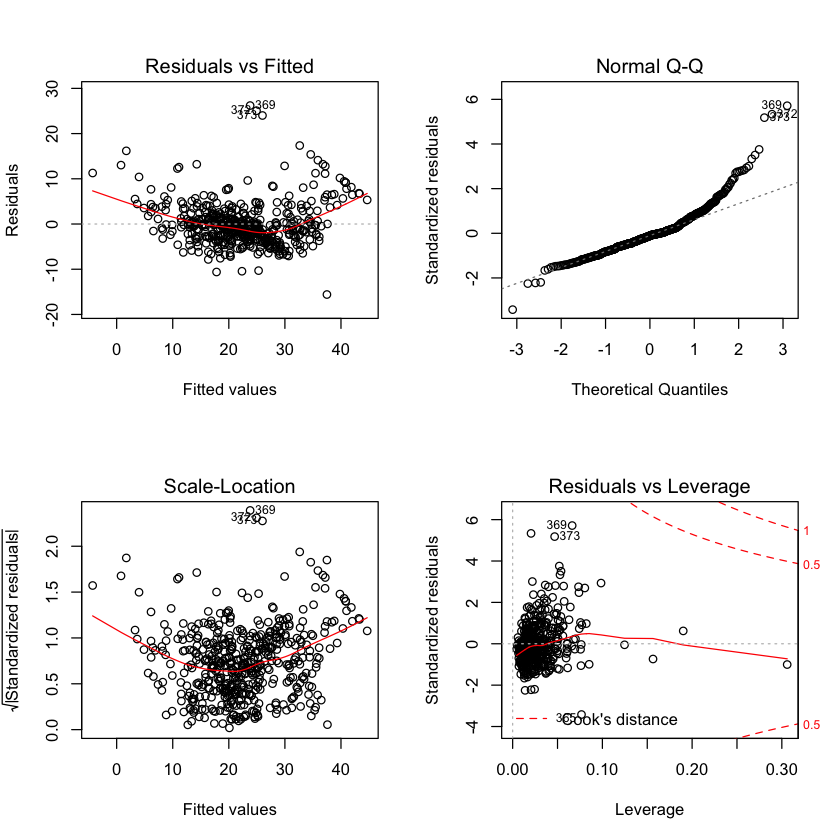

In [17]:
par(mfrow=c(2,2))
plot(lm.fit)

In [18]:
lm.fit1=lm(medv~.-age, data=Boston)
lm.fit1=update(lm.fit1,~.-age-indus) # update fit and remove specific cols
summary(lm.fit1)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

In [19]:
#library(car)
#vif(lm.fit2) # checks multicollinearity

### _3.6.4 Interaction Terms_

In [20]:
summary(lm(medv~lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


### _3.6.5 Non-Linear Transformations of the Predictors_

In [21]:
lm.fit2=lm(medv~lstat +I(lstat^2),Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [22]:
lm.fit=lm(medv~lstat)
anova(lm.fit, lm.fit2) # compare linear fit vs quadratic fit

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


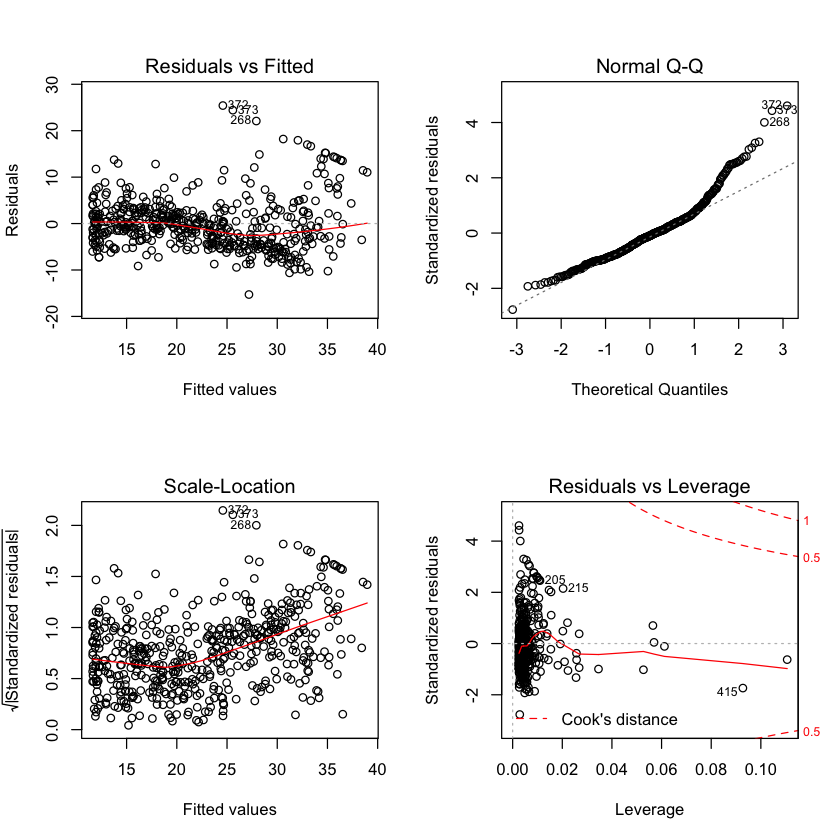

In [23]:
par(mfrow=c(2,2))
plot(lm.fit2)

In [24]:
lm.fit5=lm(medv~poly(lstat,5)) # 5th polynomial fit
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


In [25]:
summary(lm(medv~log(rm), data=Boston)) # log


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


### _3.6.6 Qualitative Predictors_

In [26]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [27]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [28]:
lm.fit=lm(Sales~.+ Income:Advertising + Price:Age, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [29]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


### _3.6.7 Writing Functions_

In [30]:
LoadLibraries=function(){
    library(ISLR)
    library(MASS)
    print("The libraries have been loaded.")
}

In [31]:
LoadLibraries()

[1] "The libraries have been loaded."


The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US



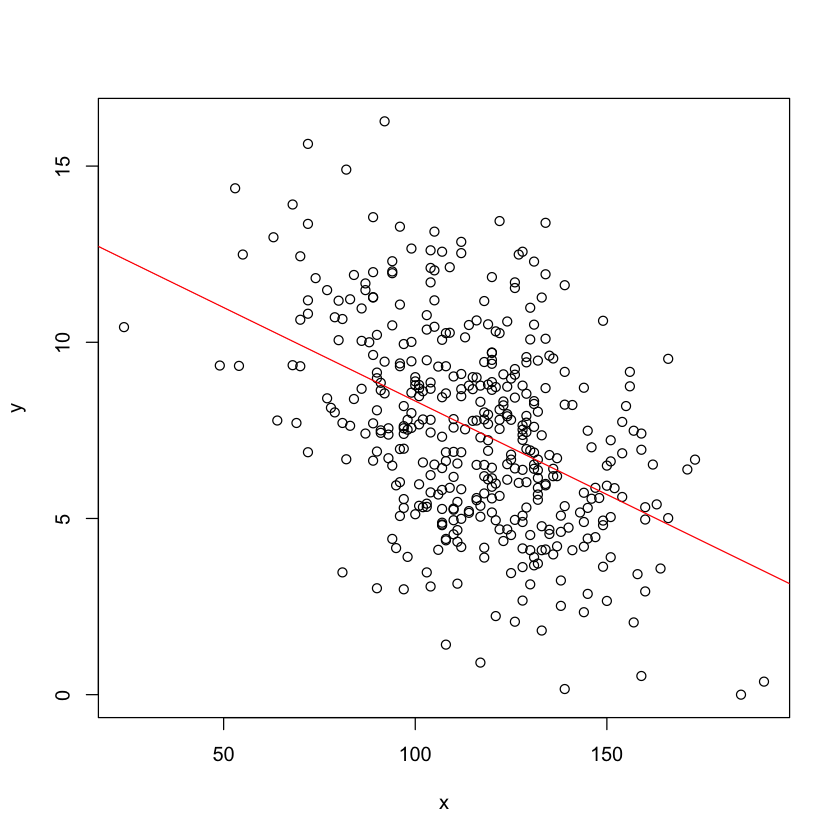

In [32]:
regplot=function(x,y){
  fit=lm(y~x)
  plot(x,y)
  abline(fit,col="red")
}

attach(Carseats)
regplot(Price,Sales)

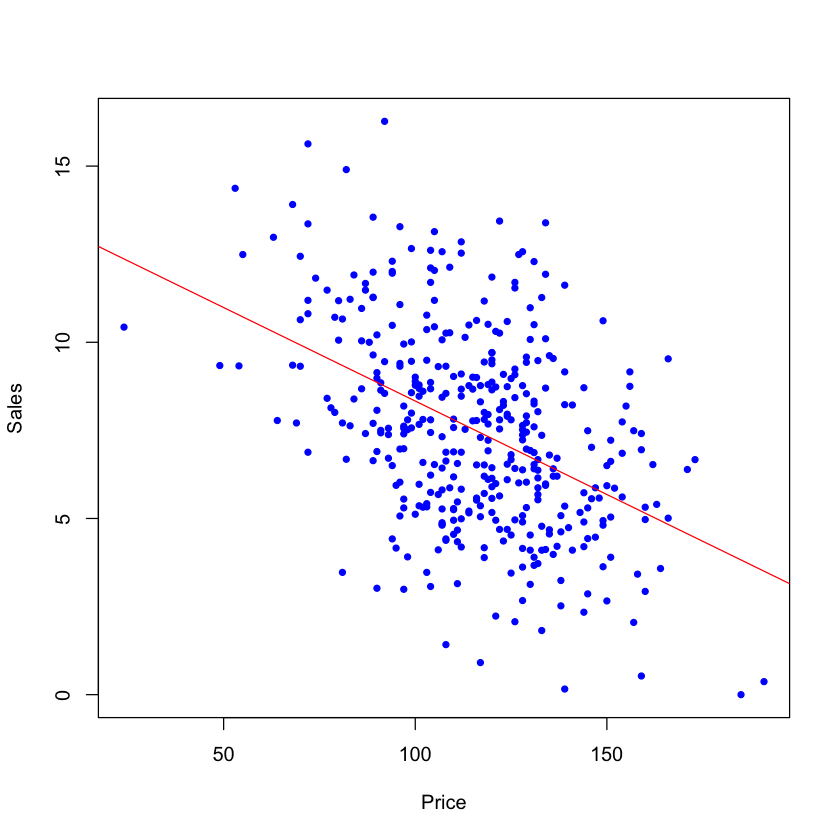

In [33]:
regplot=function(x,y,...){
  fit=lm(y~x)
  plot(x,y,...)
  abline(fit,col="red")
}
regplot(Price,Sales,xlab="Price",ylab="Sales",col="blue",pch=20)

## _Applied_

In [34]:
# 8

#### a

In [35]:
library(ISLR)
data(Auto)
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [36]:
fit=lm(mpg~horsepower, data=Auto)
summary(fit) 

# negative relationship
# reject null hypothesis
# 60% of variability in mpg can be explained via horsepower


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [37]:
predict(fit, data.frame(horsepower=98), interval="confidence") # 95% conf intervals for point 98

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [38]:
predict(fit, data.frame(horsepower=98), interval="prediction") # 95% pred intervals for point 98

,fit,lwr,upr
1,24.46708,14.8094,34.12476


#### b

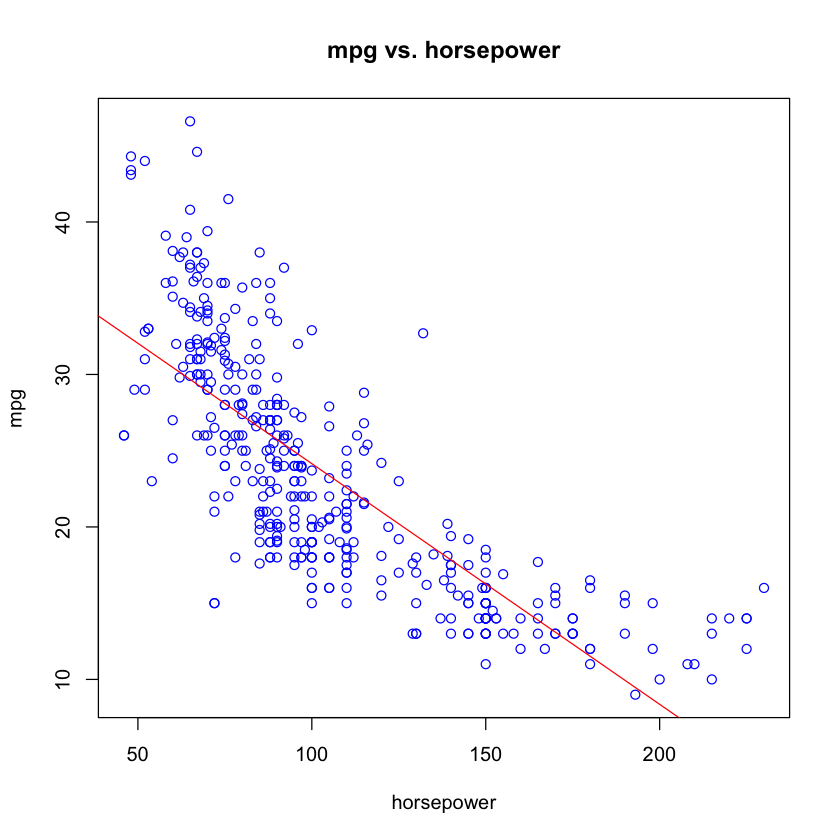

In [39]:
plot(Auto$horsepower,
     Auto$mpg,
     main = "mpg vs. horsepower",
     xlab = "horsepower",
     ylab = "mpg",
     col = "blue")
abline(fit, col = "red")

#### c

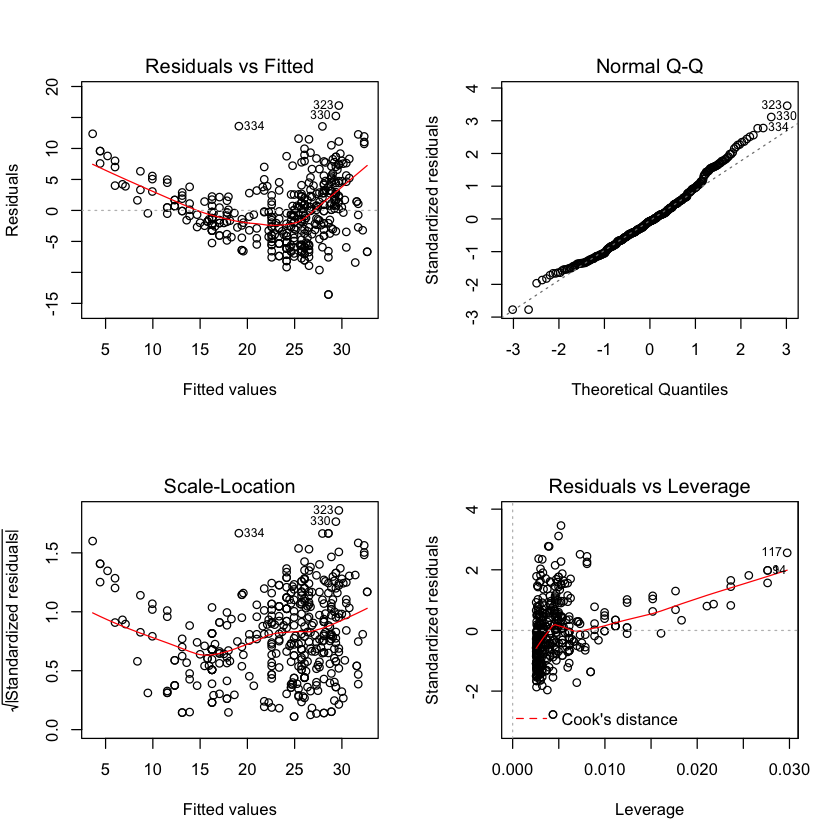

In [40]:
par(mfrow=c(2,2))
plot(fit) # LR diagnostic plots

# some non-linearity present in data
# some outliers present in data

In [41]:
# 9

#### a

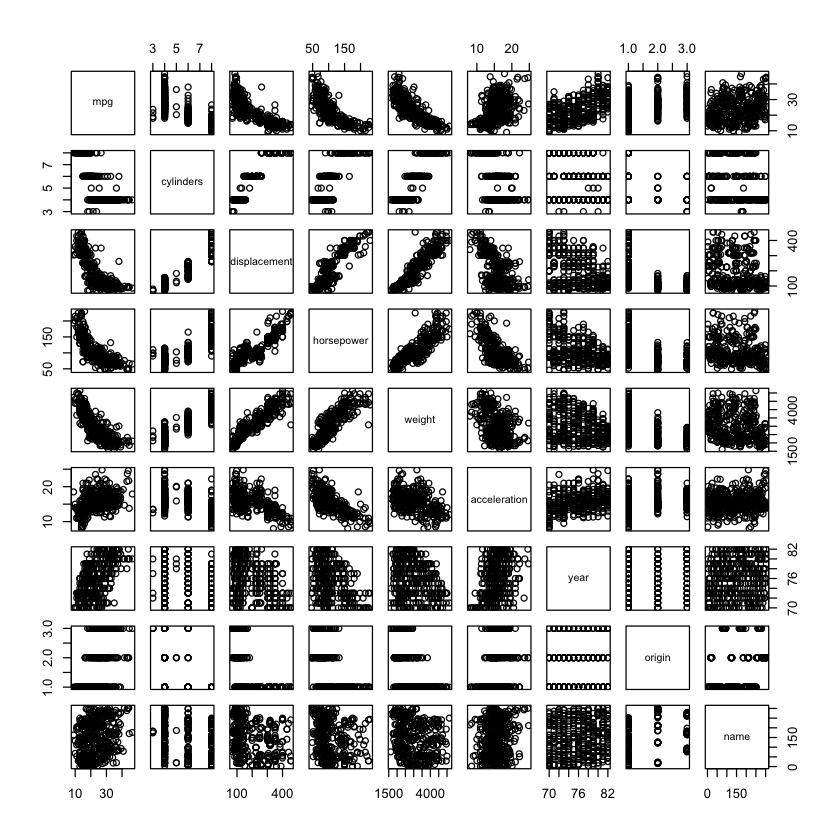

In [42]:
pairs(Auto) # scatterplot matrix for all dataset pairs

#### b

In [43]:
names(Auto) 

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

In [44]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [45]:
cor(Auto[1:8]) # variable correlations; exclude 'name' because it is qualitative

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


#### c

In [46]:
fit2=lm(mpg ~ . -name, data=Auto)
summary(fit2)

# f-statistic indicates evidence of a relationship between mpg and other predictors
# 'year' coefficient indicates ...
    # an increase of 1 year results in an increase of 0.75 in 'mpg' ...
        # while all other predictors remain constant


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


#### d

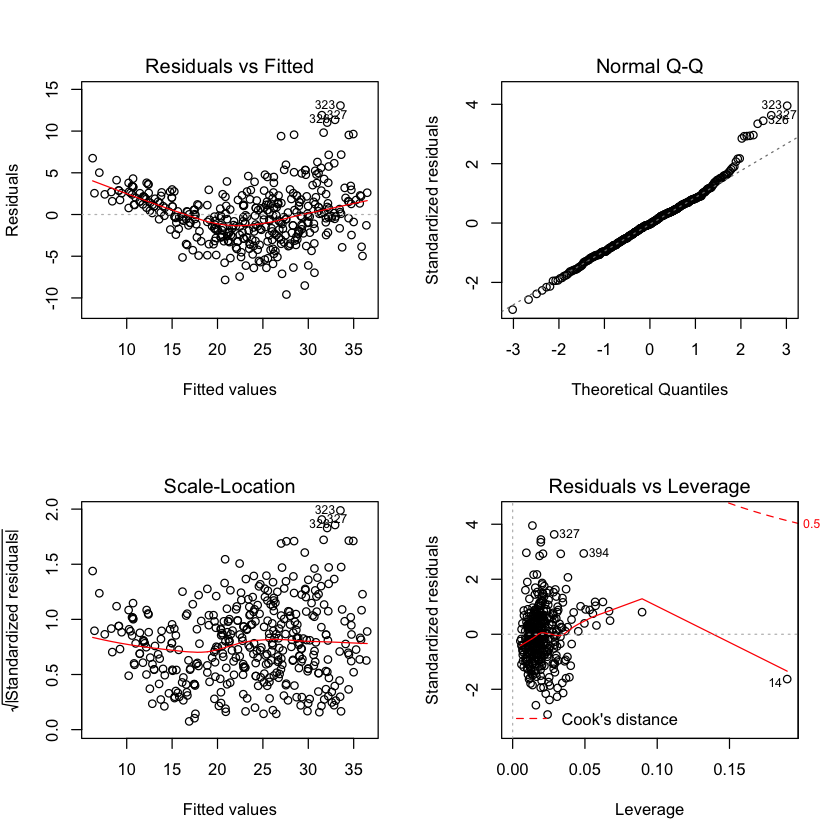

In [47]:
par(mfrow=c(2,2))
plot(fit2) # LR diagnostic plots

# some mild non-linearity present in data
# some outliers present in data

#### e

In [48]:
fit3=lm(mpg ~ cylinders*displacement + displacement*weight, data=Auto[,1:8]) # interaction terms
summary(fit3)


Call:
lm(formula = mpg ~ cylinders * displacement + displacement * 
    weight, data = Auto[, 1:8])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2934  -2.5184  -0.3476   1.8399  17.7723 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.262e+01  2.237e+00  23.519  < 2e-16 ***
cylinders               7.606e-01  7.669e-01   0.992    0.322    
displacement           -7.351e-02  1.669e-02  -4.403 1.38e-05 ***
weight                 -9.888e-03  1.329e-03  -7.438 6.69e-13 ***
cylinders:displacement -2.986e-03  3.426e-03  -0.872    0.384    
displacement:weight     2.128e-05  5.002e-06   4.254 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.103 on 386 degrees of freedom
Multiple R-squared:  0.7272,	Adjusted R-squared:  0.7237 
F-statistic: 205.8 on 5 and 386 DF,  p-value: < 2.2e-16


#### f

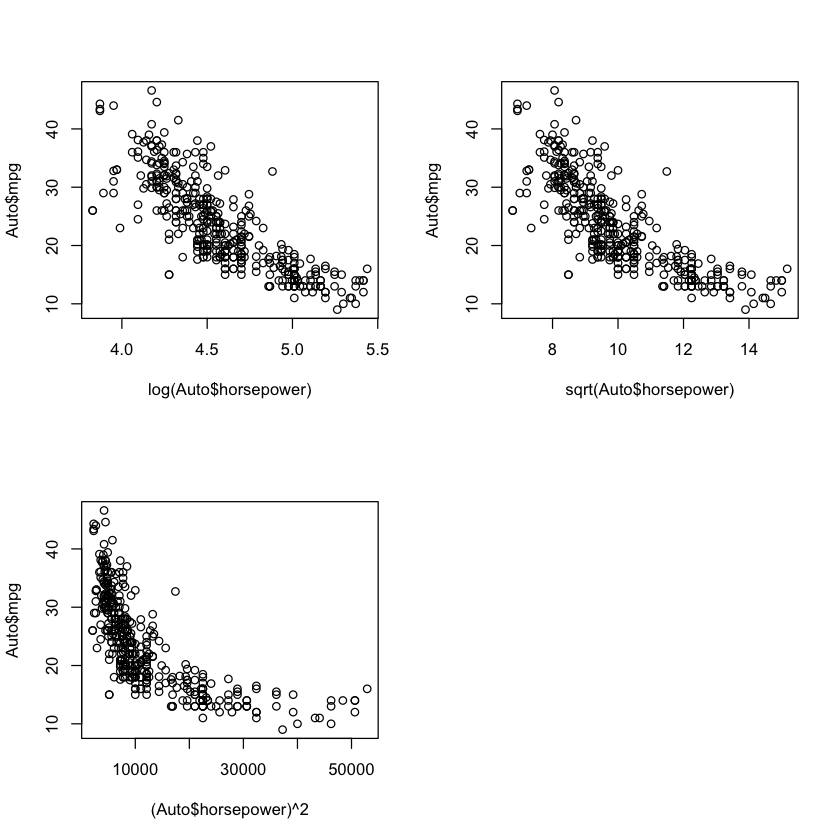

In [49]:
# experiment using 1 predictor variable

par(mfrow=c(2, 2))
plot(log(Auto$horsepower), Auto$mpg) # log slightly delivers the most linear looking plot
plot(sqrt(Auto$horsepower), Auto$mpg)
plot((Auto$horsepower)^2, Auto$mpg)

In [50]:
# 10

#### a

In [51]:
data(Carseats)

In [52]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [53]:
fit3=lm(Sales~Price+Urban+US, data=Carseats)
summary(fit3)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


#### b

In [54]:
# increase of $1 in price results in a decrease of 54.45 units in sales
# unit sales in urban store locations are 21.91 units less than rural store locations
# unit sales in US store locations are 1200.57 units greater than non US store locations

#### c

In [55]:
# Sales = 13.04 + [(-0.05) * Price] + [(-0.02 * Urban)] + [(1.20 * US)] + E

#### d

In [56]:
# reject null hypothesis for 'price' and 'US' variables

#### e

In [57]:
fit4=lm(Sales~Price+US, data=Carseats)
summary(fit4)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


#### f

In [58]:
# only 24% of variability in sales can be explained via predictors

#### g

In [59]:
confint(fit4)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


#### h

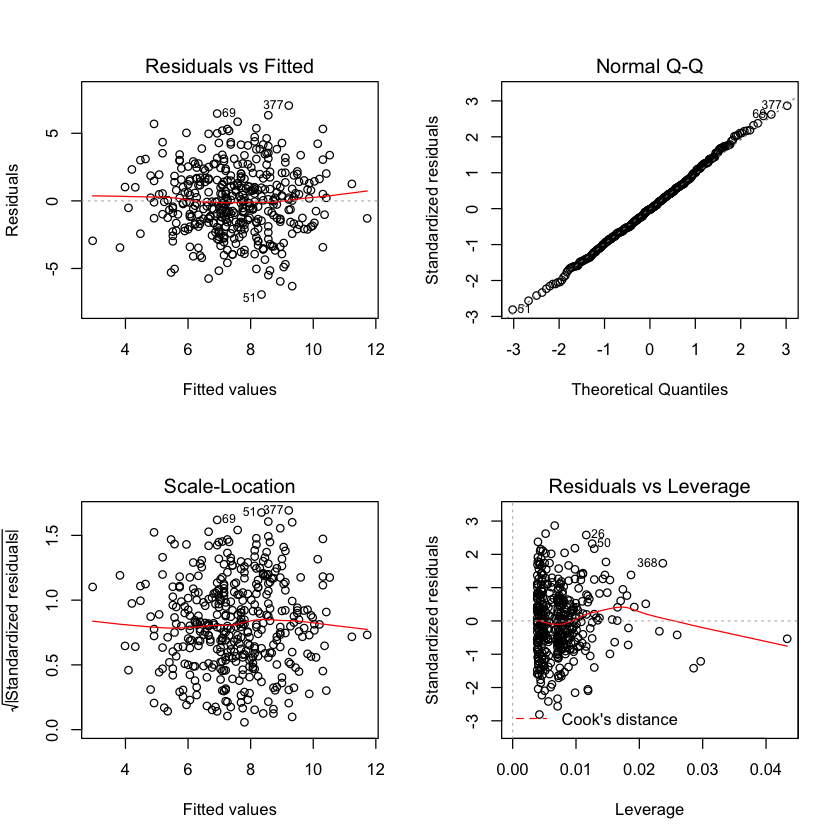

In [60]:
par(mfrow=c(2,2))
plot(fit4)

# some outliers present in data

In [61]:
# 11

In [62]:
# 12

In [63]:
# 13

In [64]:
# 14

In [65]:
# 15

#### grp